In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,NaN,0.06,8.75,0.00,0.0
1,1.51761,NaN,3.60,1.36,72.73,NaN,7.83,NaN,0.0
2,1.51618,13.53,NaN,1.54,NaN,0.39,7.78,0.00,NaN
3,1.51766,NaN,NaN,NaN,72.61,0.57,8.22,0.00,NaN
4,1.51742,13.27,3.62,1.24,NaN,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,NaN,0.00,2.88,72.61,NaN,9.18,1.06,NaN
210,1.51685,14.92,NaN,NaN,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,NaN,0.00,8.44,1.64,NaN
212,1.51651,NaN,NaN,NaN,73.61,0.00,8.48,1.57,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	33
float64		column 2	50
float64		column 3	50
float64		column 4	30
float64		column 5	30
float64		column 6	43
float64		column 7	43
float64		column 8	20
float64		column 9	73


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,181.000000,164.000000,164.000000,184.000000,184.000000,171.000000,171.000000,194.000000,141.000000
mean,1.518354,13.410732,2.776463,1.439293,72.663696,0.472807,8.919181,0.166856,0.050284
std,0.002919,0.806611,1.358929,0.486569,0.764198,0.529305,1.203712,0.470025,0.084303
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.870000,0.000000,0.000000
25%,1.516550,12.977500,2.405000,1.190000,72.310000,0.135000,8.280000,0.000000,0.000000
50%,1.517690,13.330000,3.480000,1.360000,72.785000,0.560000,8.600000,0.000000,0.000000
75%,1.519090,13.782500,3.602500,1.612500,73.062500,0.600000,9.205000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,2.880000,0.340000


<AxesSubplot:>

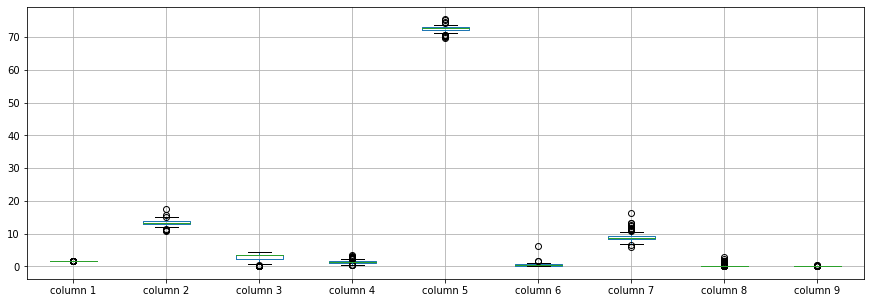

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518354
column 2    13.410732
column 3     2.776463
column 4     1.439293
column 5    72.663696
column 6     0.472807
column 7     8.919181
column 8     0.166856
column 9     0.050284
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.156543,-0.069748,-0.544517,-0.614313,-0.310869,0.785075,-0.144124,0.102924
column 2,-0.156543,1.000000,-0.164016,0.171465,-0.038924,-0.475823,-0.220548,0.435847,-0.250627
column 3,-0.069748,-0.164016,1.000000,-0.446202,-0.154402,-0.010532,-0.338842,-0.455202,0.068616
column 4,-0.544517,0.171465,-0.446202,1.000000,0.051587,0.219189,-0.246538,0.492548,-0.038898
column 5,-0.614313,-0.038924,-0.154402,0.051587,1.000000,-0.177605,-0.421186,0.042783,-0.076192
column 6,-0.310869,-0.475823,-0.010532,0.219189,-0.177605,1.000000,-0.264223,-0.079538,-0.003339
column 7,0.785075,-0.220548,-0.338842,-0.246538,-0.421186,-0.264223,1.000000,-0.149498,0.287666
column 8,-0.144124,0.435847,-0.455202,0.492548,0.042783,-0.079538,-0.149498,1.000000,-0.098920
column 9,0.102924,-0.250627,0.068616,-0.038898,-0.076192,-0.003339,0.287666,-0.098920,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [9,9+49,9+49+49,9+49+49+49,9+49+49+49+49,9+49+49+49+49+49,9+49+49+49+49,9+49+49+49,9+49+49,9+49,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 85.74678861177884
Epoch: 1 , loss: 85.62733987661508
Epoch: 2 , loss: 86.10691598745493
Epoch: 3 , loss: 85.55520747258113
Epoch: 4 , loss: 85.42897209754356
Epoch: 5 , loss: 85.88761432354266
Epoch: 6 , loss: 85.40415719839243
Epoch: 7 , loss: 85.77224496694711
Epoch: 8 , loss: 85.77603794978215
Epoch: 9 , loss: 85.39980140099159
Epoch: 10 , loss: 85.77707906869742
Epoch: 11 , loss: 85.46818366417519
Epoch: 12 , loss: 86.10205547626202
Epoch: 13 , loss: 85.81614039494441
Epoch: 14 , loss: 85.72887831467848
Epoch: 15 , loss: 85.77325791579027
Epoch: 16 , loss: 85.70221768892728
Epoch: 17 , loss: 85.35379087007962
Epoch: 18 , loss: 86.07473754882812
Epoch: 19 , loss: 85.36767930250902
Epoch: 20 , loss: 85.70400707538312
Epoch: 21 , loss: 85.33251102154071
Epoch: 22 , loss: 85.35146859975961
Epoch: 23 , loss: 85.67588219275841
Epoch: 24 , loss: 85.76730757493239
Epoch: 25 , loss: 85.4996566772461
Epoch: 2

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.541200
column 2    14.770000
column 3     3.750000
column 4     0.290000
column 5    72.020000
column 6     0.030000
column 7     0.576249
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.000000,-71.216733,0.000000,0.0,0.000000,0.000000
1,0.0,-13.573439,0.000000,0.000000,0.000000,-0.142932,0.0,0.117606,0.000000
2,0.0,0.000000,-2.977554,0.000000,-72.342590,0.000000,0.0,0.000000,0.138007
3,0.0,-12.541671,-3.035774,-0.632634,0.000000,0.000000,0.0,0.000000,0.146336
4,0.0,0.000000,0.000000,0.000000,-72.494844,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.0,-13.793673,0.000000,0.000000,0.000000,0.358991,0.0,0.000000,0.103286
210,0.0,0.000000,0.657891,-1.196649,0.000000,0.000000,0.0,0.000000,0.000000
211,0.0,0.000000,0.000000,0.000000,-72.737172,0.000000,0.0,0.000000,0.142543
212,0.0,-14.254338,0.135449,-1.743214,0.000000,0.000000,0.0,0.000000,0.025217


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(409.5374794378851, 1090.4359815890969)

In [18]:
NRMS=numerator/denominator
NRMS


0.3755722356493267

In [19]:
new_df.iloc[66,:]

column 1     1.521520
column 2     0.281149
column 3     3.650000
column 4     0.870000
column 5    72.220000
column 6     0.190000
column 7     9.850000
column 8     0.000000
column 9     0.077769
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.640000,4.490000,1.100000,0.563267,0.060000,8.75,0.000000,0.000000
1,1.51761,0.316561,3.600000,1.360000,72.730000,0.337068,7.83,0.117606,0.000000
2,1.51618,13.530000,0.572446,1.540000,0.647410,0.390000,7.78,0.000000,0.138007
3,1.51766,0.668329,0.654226,0.657366,72.610000,0.570000,8.22,0.000000,0.146336
4,1.51742,13.270000,3.620000,1.240000,0.585156,0.550000,8.07,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.51623,0.346327,0.000000,2.880000,72.610000,0.438991,9.18,1.060000,0.103286
210,1.51685,14.920000,0.657891,0.793351,73.060000,0.000000,8.40,1.590000,0.000000
211,1.52065,14.360000,0.000000,2.020000,0.682828,0.000000,8.44,1.640000,0.142543
212,1.51651,0.125662,0.135449,0.196786,73.610000,0.000000,8.48,1.570000,0.025217


In [21]:
imputations[-1].to_excel("Glass_NL_20(imp).xlsx", index=False, header=False)